<a href="https://colab.research.google.com/github/Khoa-hub-commits/Palmistry/blob/main/Palmistry2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Import thư viện cần thiết
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2
import os
from google.colab import drive, files
import zipfile
from PIL import Image
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# 2. Kết nối và tải dữ liệu từ Google Drive
# Thay đổi đường dẫn theo thư mục của bạn
data_path = '/content/drive/MyDrive/Palmistry-Đường Chỉ Tay/Train'  # Đường dẫn tới thư mục chứa ảnh

# 3. Tiền xử lý dữ liệu
def load_and_preprocess_data(data_path):
    images = []
    labels = []
    class_names = []

    # Lấy danh sách các thư mục con (classes)
    for class_idx, class_name in enumerate(sorted(os.listdir(data_path))):
        class_path = os.path.join(data_path, class_name)
        if os.path.isdir(class_path):
            class_names.append(class_name)

            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)

                # Đọc và xử lý ảnh
                img = cv2.imread(img_path)
                if img is not None:
                    # Chuyển sang ảnh xám
                    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    # Resize về 100x100
                    resized_img = cv2.resize(gray_img, (100, 100))
                    # Chuẩn hóa pixel về [0,1]
                    normalized_img = resized_img / 255.0

                    images.append(normalized_img)
                    labels.append(class_idx)

    return np.array(images), np.array(labels), class_names

# Tải và xử lý dữ liệu
X, y, class_names = load_and_preprocess_data(data_path)
print(f"Tổng số ảnh: {len(X)}")
print(f"Các class: {class_names}")

# 4. Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Chuyển labels sang one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")

# 5. Thiết kế mô hình ANN
model = Sequential([
    Flatten(input_shape=(100, 100)),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # 3 classes
])

# 6. Compile mô hình
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Tốc độ học nhanh hơn
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# 7. Huấn luyện mô hình
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=50,
    batch_size=16,
    verbose=1
)

# 8. Đánh giá mô hình
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Lưu mô hình
model.save('/content/hand_gesture_model.h5')

# Hàm dự đoán cho ảnh mới
def predict_gesture(image_path, model, class_names):
    # Đọc và xử lý ảnh
    img = cv2.imread(image_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray_img, (100, 100))
    normalized_img = resized_img / 255.0

    # Reshape cho prediction
    img_array = normalized_img.reshape(1, 100, 100)

    # Dự đoán
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    return class_names[predicted_class], confidence

# Hàm upload và dự đoán ảnh mới
def upload_and_predict():
    uploaded = files.upload()

    for filename in uploaded.keys():
        print(f"Đang dự đoán cho ảnh: {filename}")

        # Dự đoán
        predicted_class, confidence = predict_gesture(filename, model, class_names)

        print(f"Kết quả dự đoán: {predicted_class}")
        print(f"Độ tin cậy: {confidence:.4f}")

        # Hiển thị ảnh
        img = Image.open(filename)
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.title(f"Dự đoán: {predicted_class} (Tin cậy: {confidence:.2f})")
        plt.axis('off')
        plt.show()

        # Xóa file sau khi dự đoán
        os.remove(filename)

print("\nMô hình đã được train xong!")
print("Gọi upload_and_predict() để upload ảnh mới và dự đoán")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Tổng số ảnh: 175
Các class: ['Sinh_menh', 'Tinh_duyen', 'Tri_Tue']
Train samples: 140, Test samples: 35


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     5,120,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,285,123 (20.16 MB)

 Trainable params: 5,285,123 (20.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.3424 - loss: 3.6870 - val_accuracy: 0.3714 - val_loss: 2.7112
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.4078 - loss: 4.2821 - val_accuracy: 0.4286 - val_loss: 1.1204
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.4285 - loss: 2.9684 - val_accuracy: 0.3714 - val_loss: 1.7930
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.4386 - loss: 2.2517 - val_accuracy: 0.3714 - val_loss: 1.4088
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.4440 - loss: 1.7607 - val_accuracy: 0.5143 - val_loss: 0.8399
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.4855 - loss: 1.3858 - val_accuracy: 0.6571 - val_loss: 0.7972
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.5857 - loss: 1.1880 - val_accuracy: 0.5714 - val_loss: 1.0116
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.5493 - loss: 1.0783 - val_accuracy: 0.5143 - val_loss: 1.0

Test Accuracy: 0.8000

Mô hình đã được train xong!
Gọi upload_and_predict() để upload ảnh mới và dự đoán


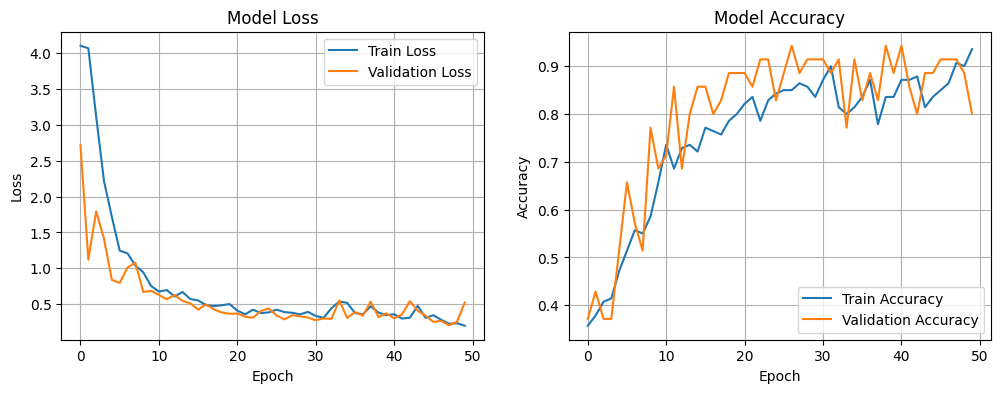

In [ ]:
# 9. Trực quan hóa kết quả huấn luyện
plt.figure(figsize=(12, 4))

# Biểu đồ Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Biểu đồ Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

Saving hinh50.jpg to hinh50.jpg
Đang dự đoán cho ảnh: hinh50.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Kết quả dự đoán: Sinh_menh
Độ tin cậy: 0.8818


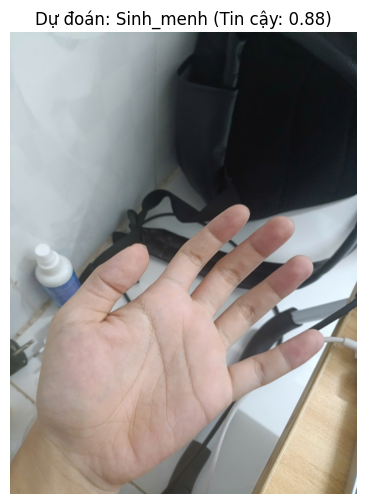

In [ ]:
upload_and_predict()

In [24]:
from google.colab import files
import ipywidgets as widgets
from IPython.display import display, clear_output
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.models import load_model # Import load_model

# Define the path to the saved model
# Update this path to where your model is saved in Google Drive
model_save_path = '/content/hand_gesture_model.h5'

# Global variables to store prediction results and the loaded model
predicted_class_name = None
prediction_confidence = None
loaded_model = None # Variable to hold the loaded model
class_names = ['Sinh_menh', 'Tinh_duyen', 'Tri_Tue'] # Define your class names

# Create output widgets for displaying images
output_original = widgets.Output()
output_processed = widgets.Output()

def load_trained_model():
    """Loads the trained Keras model."""
    global loaded_model
    try:
        loaded_model = load_model(model_save_path)
        print("Model loaded successfully.")
    except Exception as e:
        print(f"Error loading model: {e}")

# Load the model when the notebook starts
load_trained_model()

Model loaded successfully.


In [31]:
# Create widgets for file upload
upload_widget = widgets.FileUpload(
    accept='.jpg,.jpeg,.png',  # Accepted file extensions
    multiple=False  # Allow only one file upload at a time
)

# Create widgets for random example selection (assuming you have a directory of examples)
# Replace '/content/drive/MyDrive/Palmistry-Đường Chỉ Tay/Train' with your example directory path
example_dir = '/content/drive/MyDrive/Palmistry-Đường Chỉ Tay/Train'
example_files = []
if os.path.isdir(example_dir):
    for root, _, filenames in os.walk(example_dir):
        for filename in filenames:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                example_files.append(os.path.join(root, filename))

random_button = widgets.Button(description="Show Random Example")
random_output = widgets.Output()

# Function to handle random button click
def on_random_button_click(b):
    with random_output:
        clear_output(wait=True)
        if example_files:
            random_file = np.random.choice(example_files)
            print(f"Loading random example: {random_file}")
            process_and_display_image(random_file)
        else:
            print("No example files found.")

random_button.on_click(on_random_button_click)

# Create a button to save the predicted image
save_button = widgets.Button(description="Save Predicted Image")
save_output = widgets.Output()

# Variable to store the last processed image path
last_processed_image_path = None

# Function to handle save button click
def on_save_button_click(b):
    with save_output:
        clear_output(wait=True)
        if last_processed_image_path and os.path.exists(last_processed_image_path):
            try:
                files.download(last_processed_image_path)
                print(f"Downloaded: {os.path.basename(last_processed_image_path)}")
            except Exception as e:
                print(f"Error downloading file: {e}")
        else:
            print("No image to save.")

save_button.on_click(on_save_button_click)


# Modify the process_and_display_image function to store the file path
def process_and_display_image(file_path):
    """
    Loads, preprocesses, predicts, and displays an image using the trained model.

    Args:
        file_path (str): The path to the image file.
    """
    global last_processed_image_path
    last_processed_image_path = file_path # Store the file path

    with output_original:
        clear_output(wait=True)
        try:
            # Read the original image
            img_original = cv2.imread(file_path)
            if img_original is None:
                print(f"Error: Could not read image from {file_path}")
                return

            # Display the original image (convert BGR to RGB for matplotlib)
            plt.figure(figsize=(4, 4))
            plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
            plt.title("Original Image")
            plt.axis('off')
            plt.show()

        except Exception as e:
            print(f"Error displaying original image: {e}")

    with output_processed:
        clear_output(wait=True)
        try:
            # Preprocess the image
            gray_img = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
            resized_img = cv2.resize(gray_img, (100, 100))
            normalized_img = resized_img / 255.0

            # Reshape for prediction (add batch dimension)
            img_array = normalized_img.reshape(1, 100, 100)

            # Predict using the loaded model
            if loaded_model is not None:
                prediction = loaded_model.predict(img_array)
                predicted_class_index = np.argmax(prediction)
                confidence = np.max(prediction)
                predicted_class_name = class_names[predicted_class_index]

                # Display the processed image and prediction
                plt.figure(figsize=(4, 4))
                plt.imshow(resized_img, cmap='gray') # Display grayscale processed image
                plt.title(f"Processed Image\nPrediction: {predicted_class_name} ({confidence:.2f})")
                plt.axis('off')
                plt.show()
            else:
                print("Model not loaded. Cannot predict.")

        except Exception as e:
            print(f"Error processing or predicting image: {e}")

In [32]:
from google.colab import files
import ipywidgets as widgets
from IPython.display import display, clear_output
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.models import load_model # Import load_model

# Define the path to the saved model
# Update this path to where your model is saved in Google Drive
model_save_path = '/content/hand_gesture_model.h5'

# Global variables to store prediction results and the loaded model
predicted_class_name = None
prediction_confidence = None
loaded_model = None # Variable to hold the loaded model
class_names = ['Sinh_menh', 'Tinh_duyen', 'Tri_Tue'] # Define your class names

# Create output widgets for displaying images
output_original = widgets.Output()
output_processed = widgets.Output()
output_example = widgets.Output() # Add an output for the example image


def load_trained_model():
    """Loads the trained Keras model."""
    global loaded_model
    try:
        loaded_model = load_model(model_save_path)
        print("Model loaded successfully.")
    except Exception as e:
        print(f"Error loading model: {e}")

# Load the model when the notebook starts
load_trained_model()

# Create widgets for file upload
upload_widget = widgets.FileUpload(
    accept='.jpg,.jpeg,.png',  # Accepted file extensions
    multiple=False  # Allow only one file upload at a time
)

# Create widgets for random example selection (assuming you have a directory of examples)
# Replace '/content/drive/MyDrive/Palmistry-Đường Chỉ Tay/Train' with your example directory path
example_dir = '/content/drive/MyDrive/Palmistry-Đường Chỉ Tay/Train'
example_files = {}
if os.path.isdir(example_dir):
    for class_name in class_names:
        class_path = os.path.join(example_dir, class_name)
        if os.path.isdir(class_path):
            example_files[class_name] = []
            for root, _, filenames in os.walk(class_path):
                for filename in filenames:
                    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                        example_files[class_name].append(os.path.join(root, filename))


random_button = widgets.Button(description="Show Example from Predicted Class")
random_output = widgets.Output()

# Function to handle random button click
def on_random_button_click(b):
    with output_example:  # Use the new output widget for example
        clear_output(wait=True)
        global predicted_class_name
        if predicted_class_name and predicted_class_name in example_files and example_files[predicted_class_name]:
            random_file = np.random.choice(example_files[predicted_class_name])
            print(f"Loading example from {predicted_class_name}: {random_file}")
            try:
                img_example = cv2.imread(random_file)
                if img_example is not None:
                    plt.figure(figsize=(4, 4))
                    plt.imshow(cv2.cvtColor(img_example, cv2.COLOR_BGR2RGB))
                    plt.title(f"Example from {predicted_class_name} Class")
                    plt.axis('off')
                    plt.show()
                else:
                    print(f"Error: Could not read example image from {random_file}")
            except Exception as e:
                print(f"Error displaying example image: {e}")
        elif predicted_class_name:
            print(f"No example files found for class: {predicted_class_name}")
        else:
            print("Upload and process an image first to see an example from the predicted class.")


random_button.on_click(on_random_button_click)

# Create a button to save the predicted image
save_button = widgets.Button(description="Save Predicted Image")
save_output = widgets.Output()

# Variable to store the last processed image path
last_processed_image_path = None

# Function to handle save button click
def on_save_button_click(b):
    with save_output:
        clear_output(wait=True)
        if last_processed_image_path and os.path.exists(last_processed_image_path):
            try:
                files.download(last_processed_image_path)
                print(f"Downloaded: {os.path.basename(last_processed_image_path)}")
            except Exception as e:
                print(f"Error downloading file: {e}")
        else:
            print("No image to save.")

save_button.on_click(on_save_button_click)


# Modify the process_and_display_image function to store the file path and predicted class
def process_and_display_image(file_path):
    """
    Loads, preprocesses, predicts, and displays an image using the trained model.

    Args:
        file_path (str): The path to the image file.
    """
    global last_processed_image_path, predicted_class_name
    last_processed_image_path = file_path # Store the file path

    with output_original:
        clear_output(wait=True)
        try:
            # Read the original image
            img_original = cv2.imread(file_path)
            if img_original is None:
                print(f"Error: Could not read image from {file_path}")
                return

            # Display the original image (convert BGR to RGB for matplotlib)
            plt.figure(figsize=(4, 4))
            plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
            plt.title("Original Image")
            plt.axis('off')
            plt.show()

        except Exception as e:
            print(f"Error displaying original image: {e}")

    with output_processed:
        clear_output(wait=True)
        try:
            # Preprocess the image
            gray_img = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
            resized_img = cv2.resize(gray_img, (100, 100))
            normalized_img = resized_img / 255.0

            # Reshape for prediction (add batch dimension)
            img_array = normalized_img.reshape(1, 100, 100)

            # Predict using the loaded model
            if loaded_model is not None:
                prediction = loaded_model.predict(img_array)
                predicted_class_index = np.argmax(prediction)
                confidence = np.max(prediction)
                predicted_class_name = class_names[predicted_class_index] # Store predicted class name

                # Display the processed image and prediction
                plt.figure(figsize=(4, 4))
                plt.imshow(resized_img, cmap='gray') # Display grayscale processed image
                plt.title(f"Processed Image\nPrediction: {predicted_class_name} ({confidence:.2f})")
                plt.axis('off')
                plt.show()
            else:
                print("Model not loaded. Cannot predict.")

        except Exception as e:
            print(f"Error processing or predicting image: {e}")

    # Clear previous example output when a new image is processed
    with output_example:
        clear_output(wait=True)

Model loaded successfully.


In [40]:
# Function to handle uploaded files
def handle_upload(change):
    uploaded_files = change['new']
    if uploaded_files:
        # Assuming single file upload based on FileUpload widget setting
        name, content = list(uploaded_files.items())[0]
        file_path = name
        # Save the uploaded file temporarily
        with open(file_path, 'wb') as f:
            f.write(content['content'])
        print(f"Uploaded: {file_path}")
        process_and_display_image(file_path)
        # Clear the upload widget value after processing
        # Removed: upload_widget.value = {}


# Observe changes in the upload button
upload_widget.observe(handle_upload, names='value')

# Display the widgets and output areas
display(widgets.VBox([
    widgets.Label("Upload an image:"),
    upload_widget,
    random_button,
    save_button,
    widgets.HBox([output_original, output_processed, output_example]), # Display example output
    random_output,
    save_output
]))

Uploaded: hinh56.jpg
Uploaded: hinh56.jpg


TraitError: The "value" trait is read-only.

Uploaded: hinh57.jpg
Uploaded: hinh57.jpg


TraitError: The "value" trait is read-only.

In [43]:
from google.colab import files
import ipywidgets as widgets
from IPython.display import display, clear_output
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.models import load_model

# ----------------------------
# 1. Load model
# ----------------------------
model_save_path = '/content/hand_gesture_model.h5'
loaded_model = None
class_names = ['Sinh_menh', 'Tinh_duyen', 'Tri_Tue']

def load_trained_model():
    global loaded_model
    try:
        loaded_model = load_model(model_save_path)
        print("✅ Model loaded successfully.")
    except Exception as e:
        print(f"❌ Error loading model: {e}")

load_trained_model()

# ----------------------------
# 2. Global variables & widgets
# ----------------------------
predicted_class_name = None
prediction_confidence = None
last_processed_image_path = None

output_original = widgets.Output()
output_processed = widgets.Output()
output_example = widgets.Output()

upload_widget = widgets.FileUpload(
    accept='.jpg,.jpeg,.png',
    multiple=False
)

# Thư mục chứa ảnh ví dụ
example_dir = '/content/drive/MyDrive/Palmistry-Đường Chỉ Tay/Train'
example_files = {}
if os.path.isdir(example_dir):
    for class_name in class_names:
        class_path = os.path.join(example_dir, class_name)
        if os.path.isdir(class_path):
            example_files[class_name] = []
            for root, _, filenames in os.walk(class_path):
                for filename in filenames:
                    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                        example_files[class_name].append(os.path.join(root, filename))

random_button = widgets.Button(description="Show Example from Predicted Class")
save_button = widgets.Button(description="Save Prediction (txt)")

random_output = widgets.Output()
save_output = widgets.Output()

# ----------------------------
# 3. Image processing & prediction
# ----------------------------
def process_and_display_image(file_path):
    """
    Loads, preprocesses, predicts, and displays an image using the trained model.
    """
    global last_processed_image_path, predicted_class_name, prediction_confidence
    last_processed_image_path = file_path

    with output_original:
        clear_output(wait=True)
        img_original = cv2.imread(file_path)
        if img_original is None:
            print(f"❌ Error: Could not read image from {file_path}")
            return

        plt.figure(figsize=(4, 4))
        plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis('off')
        plt.show()

    with output_processed:
        clear_output(wait=True)
        try:
            gray_img = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
            resized_img = cv2.resize(gray_img, (100, 100))
            normalized_img = resized_img / 255.0
            img_array = normalized_img.reshape(1, 100, 100)

            if loaded_model is not None:
                prediction = loaded_model.predict(img_array)
                predicted_class_index = np.argmax(prediction)
                prediction_confidence = np.max(prediction)
                predicted_class_name = class_names[predicted_class_index]

                plt.figure(figsize=(4, 4))
                plt.imshow(resized_img, cmap='gray')
                plt.title(f"Processed Image\nPrediction: {predicted_class_name} ({prediction_confidence:.2f})")
                plt.axis('off')
                plt.show()
            else:
                print("❌ Model not loaded. Cannot predict.")
        except Exception as e:
            print(f"❌ Error processing or predicting image: {e}")

    with output_example:
        clear_output(wait=True)

# ----------------------------
# 4. Upload handler
# ----------------------------
def handle_upload(change):
    uploaded_files = change['new']
    if uploaded_files:
        name, content = list(uploaded_files.items())[0]
        file_path = name
        with open(file_path, 'wb') as f:
            f.write(content['content'])
        print(f"📂 Uploaded: {file_path}")
        process_and_display_image(file_path)

upload_widget.observe(handle_upload, names='value')

# ----------------------------
# 5. Random example handler
# ----------------------------
def on_random_button_click(b):
    with output_example:
        clear_output(wait=True)
        global predicted_class_name
        if predicted_class_name and predicted_class_name in example_files and example_files[predicted_class_name]:
            random_file = np.random.choice(example_files[predicted_class_name])
            print(f"📷 Example from class {predicted_class_name}:")
            img_example = cv2.imread(random_file)
            if img_example is not None:
                plt.figure(figsize=(4, 4))
                plt.imshow(cv2.cvtColor(img_example, cv2.COLOR_BGR2RGB))
                plt.title(f"Example - {predicted_class_name}")
                plt.axis('off')
                plt.show()
            else:
                print(f"❌ Could not read example image: {random_file}")
        else:
            print("⚠️ Upload and process an image first.")

random_button.on_click(on_random_button_click)

# ----------------------------
# 6. Save prediction as text
# ----------------------------
def on_save_button_click(b):
    with save_output:
        clear_output(wait=True)
        global last_processed_image_path, predicted_class_name, prediction_confidence
        if last_processed_image_path and predicted_class_name:
            try:
                text_content = (
                    f"File gốc: {os.path.basename(last_processed_image_path)}\n"
                    f"Dự đoán: {predicted_class_name}\n"
                    f"Độ tin cậy: {prediction_confidence:.4f}\n"
                )
                text_file = "prediction_result.txt"
                with open(text_file, "w") as f:
                    f.write(text_content)

                files.download(text_file)
                print(f"📥 Downloaded: {text_file}")
            except Exception as e:
                print(f"❌ Error saving file: {e}")
        else:
            print("⚠️ No prediction result to save.")

save_button.on_click(on_save_button_click)

# ----------------------------
# 7. Display UI
# ----------------------------
display(widgets.VBox([
    widgets.Label("👉 Upload an image:"),
    upload_widget,
    random_button,
    save_button,
    widgets.HBox([output_original, output_processed, output_example]),
    random_output,
    save_output
]))


✅ Model loaded successfully.


📂 Uploaded: hinh57.jpg


In [67]:
import cv2, base64, os
import numpy as np
from IPython.display import Javascript, display, HTML
from tensorflow.keras.models import load_model

# Load model
model_path = "/content/hand_gesture_model.h5"
model = load_model(model_path)
print(f"✅ Model loaded: {model_path}")

# Encode ảnh sang base64
def encode_image_base64(img):
    _, buffer = cv2.imencode(".jpg", img)
    return base64.b64encode(buffer).decode("utf-8")

# JS render UI
def display_in_html(uploaded_b64, processed_b64, pred_class, confidence, description):
    display(Javascript(f"""
        renderPrediction("data:image/jpg;base64,{uploaded_b64}",
                         "data:image/jpg;base64,{processed_b64}",
                         "{pred_class}", {confidence}, "{description}");
    """))

# Predict function
def predict_and_display(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Resize theo input của model (100x100)
    resized = cv2.resize(gray, (100,100)) / 255.0
    input_img = resized.reshape(1,100,100,1)

    preds = model.predict(input_img)
    pred_class = np.argmax(preds)
    confidence = float(np.max(preds))

    uploaded_b64 = encode_image_base64(cv2.resize(img, (200,200)))
    processed_b64 = encode_image_base64(cv2.resize(gray, (200,200)))

    classes = ["Sinh mệnh", "Tình duyên", "Trí tuệ"]
    descriptions = {
        "Sinh mệnh": "👉 Thể hiện sức khỏe, năng lượng sống và sự bền bỉ.",
        "Tình duyên": "💖 Liên quan đến cảm xúc, tình cảm, mối quan hệ.",
        "Trí tuệ": "🧠 Phản ánh tư duy logic, học tập và sự thông minh."
    }

    display_in_html(uploaded_b64, processed_b64,
                    classes[pred_class], confidence,
                    descriptions[classes[pred_class]])

# HTML + JS App
html_code = """
<div id="app" style="font-family:sans-serif; background:#1e2a38; color:white; padding:20px; border-radius:12px; max-width:800px;">
  <h2 style="color:#ffcc00;">✋ Palm Line Recognition App</h2>
  <p><b style="color:#00ffcc;">Upload your palm image:</b></p>
  <input type="file" id="uploader" accept="image/*" onchange="handleUpload(event)"/>
  <hr style="border:1px solid #555;">
  <div style="display:flex; gap:20px;">
    <div>
      <h3 style="color:#00ffcc;">Uploaded Image</h3>
      <img id="uploaded" width="250" style="border:2px solid #ccc;"/>
    </div>
    <div>
      <h3 style="color:#00ffcc;">Processed Image</h3>
      <img id="processed" width="250" style="border:2px solid #ccc;"/>
    </div>
  </div>
  <h3 id="result" style="color:#ffcc00;">Prediction: ...</h3>
  <p id="meaning" style="font-size:16px; color:#ffffff;"></p>
  <button onclick="saveResult()" style="background:#28a745; color:white; padding:10px 20px; border:none; border-radius:8px; cursor:pointer;">💾 Save Result</button>
</div>

<script>
let latestResult = "";

function renderPrediction(uploadedSrc, processedSrc, predClass, confidence, description) {
  document.getElementById("uploaded").src = uploadedSrc;
  document.getElementById("processed").src = processedSrc;
  document.getElementById("result").innerText =
    "Prediction: " + predClass + " (Confidence: " + (confidence*100).toFixed(2) + "%)";
  document.getElementById("meaning").innerText = description;
  latestResult = predClass + " - " + (confidence*100).toFixed(2) + "%\\n" + description;
}

function saveResult() {
  if (!latestResult) {
    alert("No prediction to save yet!");
    return;
  }
  let blob = new Blob([latestResult], { type: "text/plain" });
  let link = document.createElement("a");
  link.href = URL.createObjectURL(blob);
  link.download = "prediction_result.txt";
  link.click();
}

// Fake upload handler (vì trong Colab không thể bắt file trực tiếp qua JS)
function handleUpload(event) {
  alert("📌 Trong Colab, hãy dùng Python để upload file test. Nút này chỉ để hiển thị UI.");
}
</script>
"""

display(HTML(html_code))


✅ Model loaded: /content/hand_gesture_model.h5



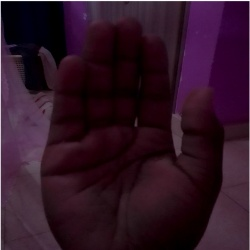
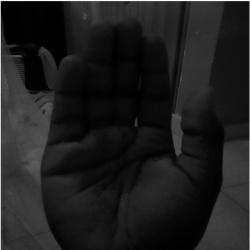

In [71]:
import cv2, base64, io
import numpy as np
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
from tensorflow.keras.models import load_model

# Load model
model_path = "/content/hand_gesture_model.h5"
model = load_model(model_path)
print("✅ Model loaded")

# Classes + meanings
classes = ["Sinh mệnh", "Tình duyên", "Trí tuệ"]
descriptions = {
    "Sinh mệnh": "👉 Thể hiện sức khỏe, năng lượng sống và sự bền bỉ.",
    "Tình duyên": "💖 Liên quan đến cảm xúc, tình cảm, mối quan hệ.",
    "Trí tuệ": "🧠 Phản ánh tư duy logic, học tập và sự thông minh."
}

# Helper: encode ảnh sang base64 để nhúng HTML
def encode_img(img, gray=False):
    if gray:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (250,250))
    _, buf = cv2.imencode(".jpg", img)
    return base64.b64encode(buf).decode("utf-8")

# Predict function
def predict_image(content):
    img_array = np.frombuffer(content, np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    resized = cv2.resize(gray, (100,100)) / 255.0
    input_img = resized.reshape(1,100,100,1)

    preds = model.predict(input_img)
    pred_class = np.argmax(preds)
    confidence = float(np.max(preds))

    cls = classes[pred_class]
    desc = descriptions[cls]

    # Encode ảnh để hiển thị trong HTML
    uploaded_b64 = encode_img(img)
    processed_b64 = encode_img(img, gray=True)

    # Render HTML UI
    html = f"""
    <div style="font-family:sans-serif; background:#1e2a38; color:white; padding:20px; border-radius:12px; max-width:850px;">
      <h2 style="color:#ffcc00;">✋ Palm Line Recognition App</h2>
      <div style="display:flex; gap:20px;">
        <div>
          <h3 style="color:#00ffcc;">Uploaded Image</h3>
          <img src="data:image/jpg;base64,{uploaded_b64}" style="border:2px solid #ccc; border-radius:8px;" width="250"/>
        </div>
        <div>
          <h3 style="color:#00ffcc;">Processed Image</h3>
          <img src="data:image/jpg;base64,{processed_b64}" style="border:2px solid #ccc; border-radius:8px;" width="250"/>
        </div>
      </div>
      <h3 style="color:#ffcc00; margin-top:15px;">Prediction: {cls} (Confidence: {confidence*100:.2f}%)</h3>
      <p style="font-size:16px; color:#ffffff;">{desc}</p>
    </div>
    """
    clear_output(wait=True)
    display(ui)  # giữ lại UI widgets
    display(HTML(html))

    # Trả về text để Save
    return f"Prediction: {cls} ({confidence*100:.2f}%)\n{desc}"

# ========== Widgets ==========
upload_btn = widgets.FileUpload(accept="image/*", multiple=False, description="📂 Upload Palm Image")
save_btn = widgets.Button(description="💾 Save Result", button_style="success")
status_out = widgets.Output()

ui = widgets.VBox([
    widgets.HTML("<h2 style='color:#ffcc00; background:#333; padding:10px; border-radius:8px;'>Palm Line Recognition</h2>"),
    upload_btn,
    save_btn,
    status_out
])

display(ui)

# Global storage for result text
latest_result = {"text": ""}

# Handlers
def on_upload_change(change):
    if upload_btn.value:
        for name, file_info in upload_btn.value.items():
            latest_result["text"] = predict_image(file_info["content"])

def on_save_click(b):
    if latest_result["text"]:
        with open("prediction_result.txt", "w", encoding="utf-8") as f:
            f.write(latest_result["text"])
        with status_out:
            clear_output()
            print("💾 Saved to prediction_result.txt")
    else:
        with status_out:
            clear_output()
            print("⚠️ No prediction yet!")

upload_btn.observe(on_upload_change, names="value")
save_btn.on_click(on_save_click)
